# House Price Prediction using Linear Regression
## 1.   This model predicts the house prices using linear regression model.
## 2.   The dataset is of zameen.com, one of Pakistan's prime online real estate platform.
## 3.   The dataset is very large consisting of 191,393 records for five cities as: 
### - Karachi
### - Lahore
### - Rawalpindi
### - Islamabad
### - Faisalabad.
## 4.   We are using the data from Karachi to apply the price prediction model for 'Karachi'.
## 5.   Moreover, There are many property types such as plot, house, flat, penthouse etc. 
## 6.   For building an efficient model we have used property type as 'House'.

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')
%matplotlib inline

In [2]:
#reading dataset
df =  pd.read_csv('property_House_Zammeen_com.csv', sep=',')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    191393 non-null  int64  
 1   location_id    191393 non-null  int64  
 2   property_type  191393 non-null  object 
 3   price          191393 non-null  int64  
 4   location       191393 non-null  object 
 5   city           191393 non-null  object 
 6   province_name  191393 non-null  object 
 7   latitude       191393 non-null  float64
 8   longitude      191393 non-null  float64
 9   baths          191393 non-null  int64  
 10  area           191393 non-null  object 
 11  purpose        191393 non-null  object 
 12  bedrooms       191393 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 19.0+ MB


In [3]:
df.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms
0,347795,8,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0
1,482892,48,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5
2,555962,75,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3
3,562843,3821,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8
4,686990,3522,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6


## Missing Values Analysis

<Axes: >

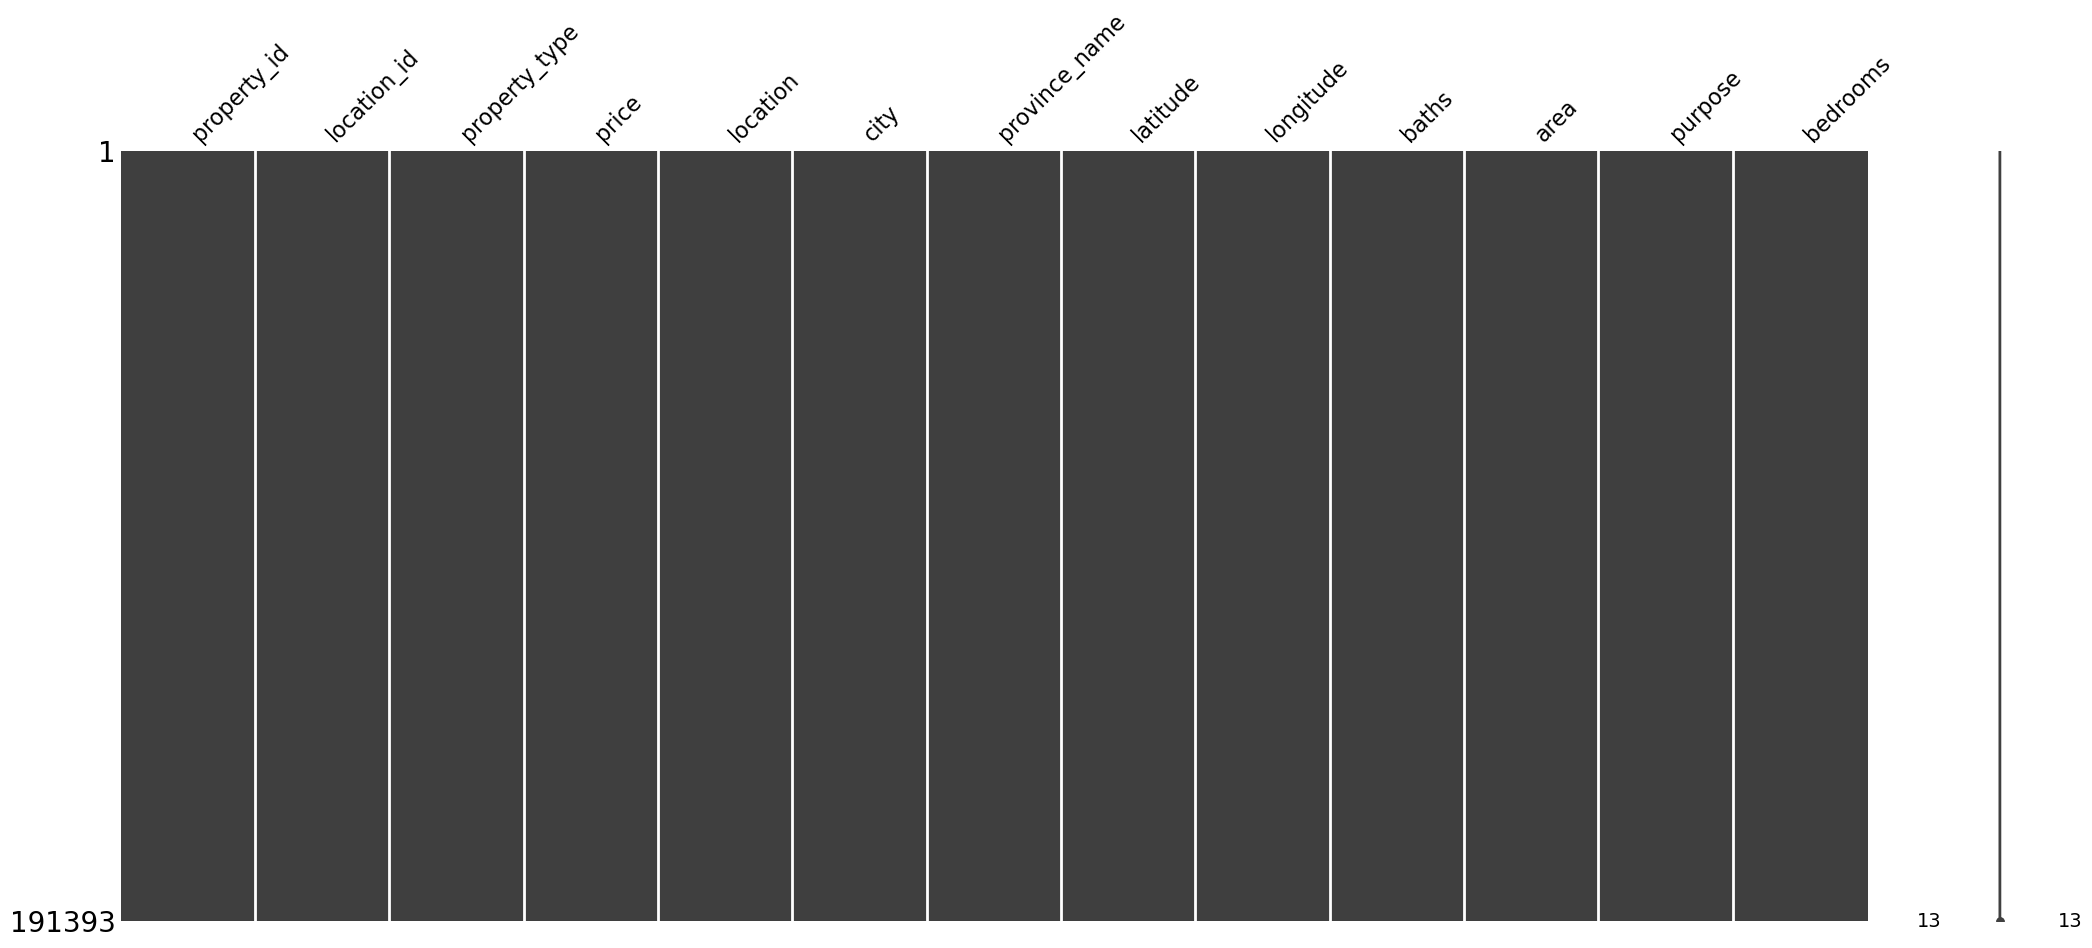

In [4]:
# Importing the libraries 
import pandas as pd 
import missingno as msno 
# Visualize missing values as a matrix 
msno.matrix(df) 

In [5]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Print columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [6]:
# Calculate percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display columns with missing values and their percentages
print(missing_percentage[missing_percentage > 0])

Series([], dtype: float64)


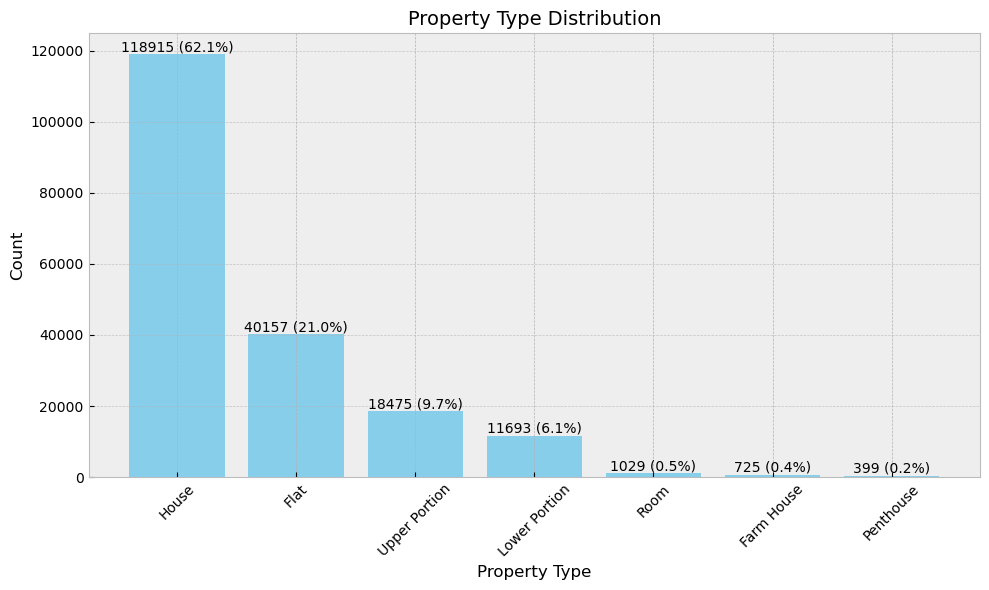

In [7]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'property_type' column
property_counts = df['property_type'].value_counts()

# Calculate percentages
property_percentages = (property_counts / property_counts.sum()) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(property_counts.index, property_counts, color='skyblue')

# Add labels for each bar (both counts and percentages)
for bar, count, percentage in zip(bars, property_counts, property_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text horizontally on the bar
        bar.get_height(),  # Position the text just above the bar
        f"{count} ({percentage:.1f}%)",  # Label format: count (percentage)
        ha='center', va='bottom', fontsize=10
    )

# Add labels and title
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Property Type Distribution', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for better visualization

# Show the plot
plt.tight_layout()
plt.show()


Filter Rows only for House and Flat

In [8]:
# Filter the DataFrame to keep only rows containing 'House' or 'Flat' in the 'property_type' column
df = df[df['property_type'].isin(['House', 'Flat'])]

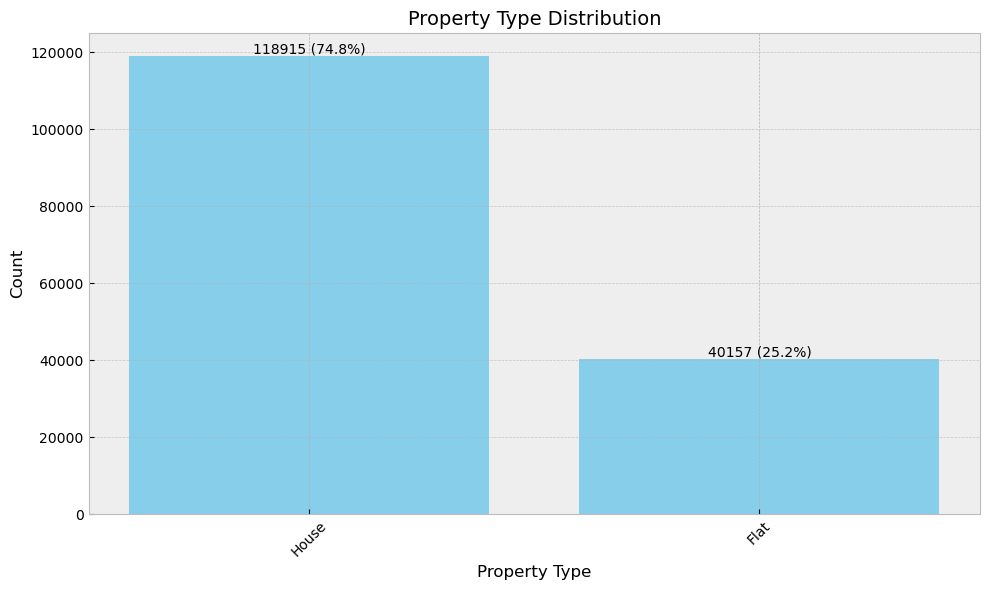

In [9]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'property_type' column
property_counts = df['property_type'].value_counts()

# Calculate percentages
property_percentages = (property_counts / property_counts.sum()) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(property_counts.index, property_counts, color='skyblue')

# Add labels for each bar (both counts and percentages)
for bar, count, percentage in zip(bars, property_counts, property_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text horizontally on the bar
        bar.get_height(),  # Position the text just above the bar
        f"{count} ({percentage:.1f}%)",  # Label format: count (percentage)
        ha='center', va='bottom', fontsize=10
    )

# Add labels and title
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Property Type Distribution', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for better visualization

# Show the plot
plt.tight_layout()
plt.show()


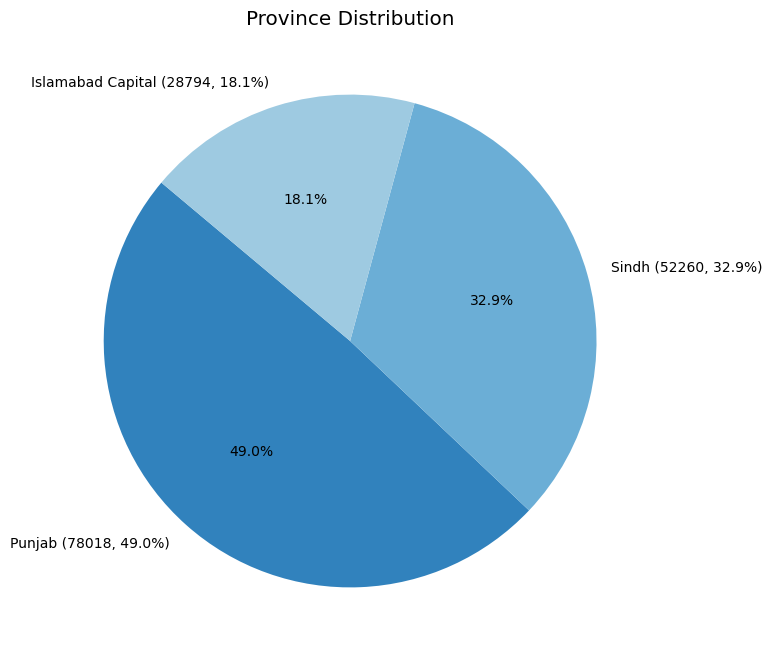

In [10]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'province_name' column
province_counts = df['province_name'].value_counts()

# Calculate percentages
province_percentages = (province_counts / province_counts.sum()) * 100

# Create labels with counts and percentages
labels = [
    f"{index} ({count}, {percentage:.1f}%)"
    for index, count, percentage in zip(province_counts.index, province_counts, province_percentages)
]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    province_counts, 
    labels=labels, 
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=140, 
    colors=plt.cm.tab20c.colors  # Use a different color palette for variety
)

# Add a title
plt.title('Province Distribution')

# Show the plot
plt.show()

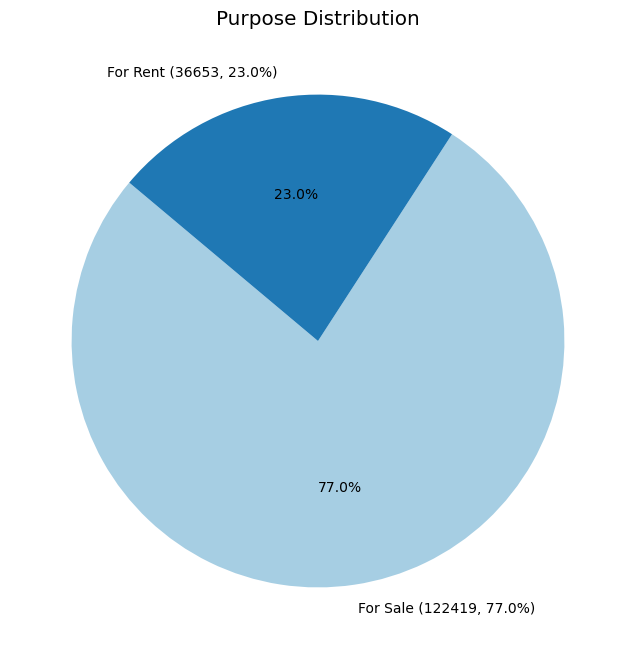

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Count occurrences of each category in the 'purpose' column
purpose_counts = df['purpose'].value_counts()

# Calculate percentages
purpose_percentages = (purpose_counts / purpose_counts.sum()) * 100

# Create labels with counts and percentages
labels = [f"{index} ({count}, {percentage:.1f}%)" for index, count, percentage in zip(purpose_counts.index, purpose_counts, purpose_percentages)]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    purpose_counts, 
    labels=labels, 
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=140, 
    colors=plt.cm.Paired.colors
)

# Add a title
plt.title('Purpose Distribution')

# Show the plot
plt.show()

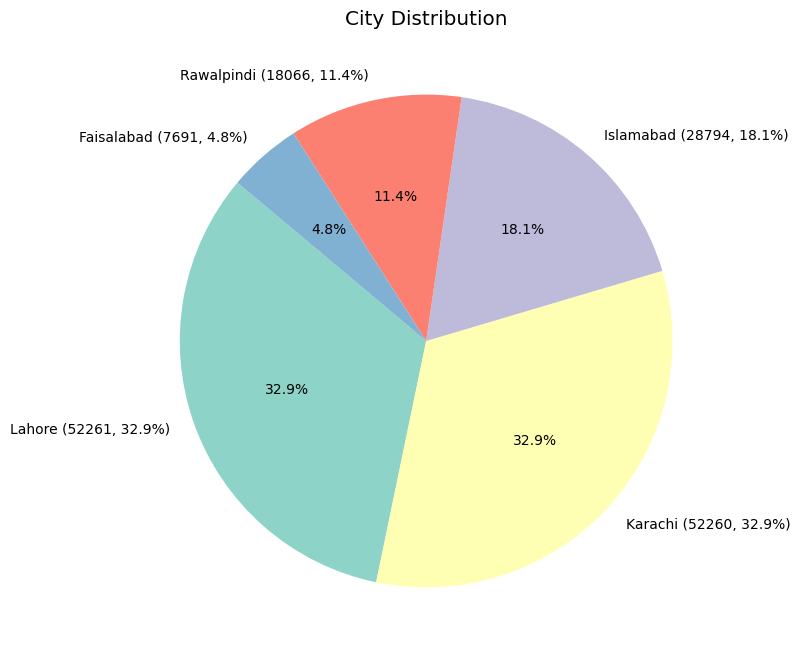

In [12]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'city' column
city_counts = df['city'].value_counts()

# Calculate percentages
city_percentages = (city_counts / city_counts.sum()) * 100

# Create labels with counts and percentages
labels = [
    f"{index} ({count}, {percentage:.1f}%)"
    for index, count, percentage in zip(city_counts.index, city_counts, city_percentages)
]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    city_counts, 
    labels=labels, 
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=140, 
    colors=plt.cm.Set3.colors  # Use Set3 color palette for variation
)

# Add a title
plt.title('City Distribution')

# Show the plot
plt.show()

import folium
import pandas as pd

# Create a base map centered on the mean latitude and longitude
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)

# Add markers for each location
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row.get('location', ''),  # Replace 'location' with your column name if present
        tooltip=f"Lat: {row['latitude']}, Long: {row['longitude']}"
    ).add_to(m)

# Save or display the map
m.save("map.html")
m  # This will display the map in Jupyter Notebook


#filtering the data for city as 'Karachi' and property type as 'House' and Purpose is 'For sale'
df = df[(df['city'] == 'Karachi') & (df['purpose'] == 'For Sale') & (df['property_type'] == 'House')]
df = df.drop(['property_id','Unnamed: 0','property_type','city','province_name','latitude','longitude','purpose'], axis=1)
df.info()

In [13]:
len(df['location'].unique())

1496

# Deleting rows where location data has insufficient records, so as to improve model prection performance
df = df[df['location'].isin(df['location'].value_counts()[df['location'].value_counts() >= 25].index)]
#df.to_csv('locations.csv')
df.shape

In [14]:
len(df['location'].value_counts())

1496

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159072 entries, 0 to 191391
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    159072 non-null  int64  
 1   location_id    159072 non-null  int64  
 2   property_type  159072 non-null  object 
 3   price          159072 non-null  int64  
 4   location       159072 non-null  object 
 5   city           159072 non-null  object 
 6   province_name  159072 non-null  object 
 7   latitude       159072 non-null  float64
 8   longitude      159072 non-null  float64
 9   baths          159072 non-null  int64  
 10  area           159072 non-null  object 
 11  purpose        159072 non-null  object 
 12  bedrooms       159072 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 17.0+ MB


In [16]:
#converting location column to from categorical to numerical
locations = df['location'].unique()
locations_dict = {locations[i]: i  for i in range(len(locations))}

df.loc[:, 'location'] = df['location'].replace(locations_dict)
df.location.unique()
df['location']=df['location'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159072 entries, 0 to 191391
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    159072 non-null  int64  
 1   location_id    159072 non-null  int64  
 2   property_type  159072 non-null  object 
 3   price          159072 non-null  int64  
 4   location       159072 non-null  int32  
 5   city           159072 non-null  object 
 6   province_name  159072 non-null  object 
 7   latitude       159072 non-null  float64
 8   longitude      159072 non-null  float64
 9   baths          159072 non-null  int64  
 10  area           159072 non-null  object 
 11  purpose        159072 non-null  object 
 12  bedrooms       159072 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 16.4+ MB


C:\Users\HP\AppData\Local\Temp\ipykernel_8476\3208946132.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'location'] = df['location'].replace(locations_dict)


In [17]:
#calculating the area in square feet, and convert it from string to numerical
df = df.copy()
df['area_num'] = df['area'].str.split(' ').str[0]
df['area_str'] = df['area'].str.split(' ').str[1]
df.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,area_num,area_str
0,347795,8,House,220000000,0,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,6,Kanal
1,482892,48,House,40000000,1,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,1,Kanal
2,555962,75,House,9500000,2,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,9,Marla
3,562843,3821,House,125000000,3,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,1,Kanal
4,686990,3522,House,21000000,4,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,11,Marla


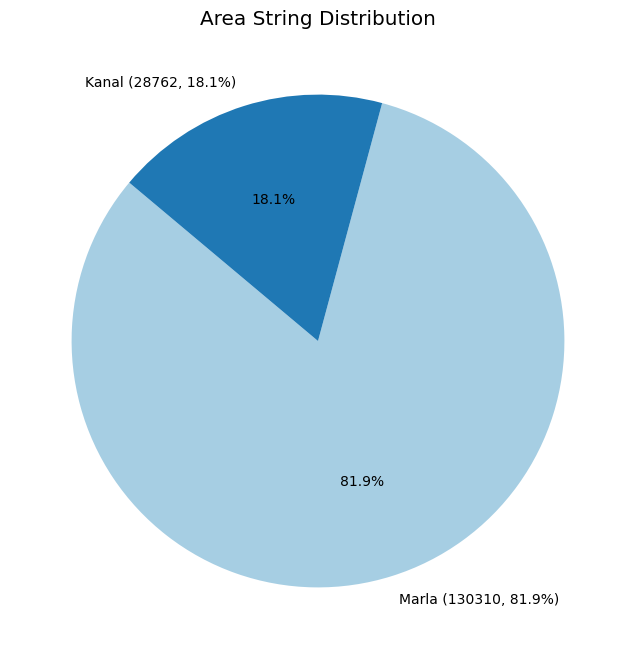

In [18]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'area_str' column
area_counts = df['area_str'].value_counts()

# Calculate percentages
area_percentages = (area_counts / area_counts.sum()) * 100

# Create labels with counts and percentages
labels = [
    f"{index} ({count}, {percentage:.1f}%)"
    for index, count, percentage in zip(area_counts.index, area_counts, area_percentages)
]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    area_counts, 
    labels=labels, 
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=140, 
    colors=plt.cm.Paired.colors  # Use a different color palette for variety
)

# Add a title
plt.title('Area String Distribution')

# Show the plot
plt.show()

In [19]:
df.area_str.unique()

array(['Kanal', 'Marla'], dtype=object)

In [20]:
df['area_num'] = df['area_num'].str.replace(',', '')
df['area_num'].unique()

array(['6', '1', '9', '11', '8', '1.6', '7.5', '1.2', '5', '10', '18',
       '12', '3', '6.5', '2.5', '2', '1.1', '4.7', '9.7', '17', '4', '14',
       '5.5', '8.2', '7', '10.1', '4.4', '15', '1.7', '13', '1.5', '1.4',
       '1.3', '4.3', '2.2', '16', '8.9', '3.2', '9.6', '9.8', '10.2',
       '11.4', '13.1', '4.8', '7.6', '5.4', '13.4', '13.2', '5.2', '6.1',
       '9.1', '4.2', '10.6', '6.7', '11.2', '15.8', '12.2', '10.3', '3.7',
       '17.5', '5.1', '8.8', '3.4', '2.9', '5.8', '3.6', '18.2', '11.8',
       '6.2', '3.3', '4.9', '18.4', '7.3', '11.7', '5.6', '8.1', '10.7',
       '2.8', '1.8', '12.5', '1.9', '7.1', '7.8', '4.5', '3.1', '8.4',
       '17.8', '5.3', '2.1', '10.9', '3.8', '6.9', '6.6', '11.1', '4.1',
       '16.4', '9.3', '4.6', '2.7', '11.5', '0.9', '14.7', '14.2', '13.3',
       '2.4', '11.6', '3.5', '15.2', '10.8', '6.4', '5.7', '5.9', '8.7',
       '19.1', '6.3', '13.8', '15.3', '2.6', '8.3', '7.9', '12.4', '19',
       '15.9', '3.9', '17.3', '12.6', '7.2', '8.6'

In [ ]:
# Define a function to convert the area based on the unit
def convert_to_marlas(row):
    if row['area_str'] == 'Kanal':
        return row['area_num'] * 20  # 1 Kanal = 20 Marlas
    elif row['area_str'] == 'Marla':
        return row['area_num']  # No conversion needed if it's already in Marlas
    else:
        return None  # Handle cases where the unit is neither Kanal nor Marla

# Apply the function to create the new column 'Area' in Marlas
df['Area'] = df.apply(convert_to_marlas, axis=1)

# Verify the new 'Area' column
print(df[['area_num', 'area_str', 'Area']].head())


In [21]:
df = df.copy()

df['area_str'] = df['area_str'].replace({
    'Kanal': '4500',
    'Marla': '225'
}).astype(int)

df['area_num'] = df['area_num'].astype(float)

In [22]:
df.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,area_num,area_str
0,347795,8,House,220000000,0,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,6.0,4500
1,482892,48,House,40000000,1,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,1.0,4500
2,555962,75,House,9500000,2,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,9.0,225
3,562843,3821,House,125000000,3,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,1.0,4500
4,686990,3522,House,21000000,4,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,11.0,225


In [23]:
df.area = (df.area_num*df.area_str)
#df.area = df.area.astype(float)
df['pricepersqft'] = df['price'] / df['area']
df = df.drop(['area_num','area_str'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159072 entries, 0 to 191391
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    159072 non-null  int64  
 1   location_id    159072 non-null  int64  
 2   property_type  159072 non-null  object 
 3   price          159072 non-null  int64  
 4   location       159072 non-null  int32  
 5   city           159072 non-null  object 
 6   province_name  159072 non-null  object 
 7   latitude       159072 non-null  float64
 8   longitude      159072 non-null  float64
 9   baths          159072 non-null  int64  
 10  area           159072 non-null  float64
 11  purpose        159072 non-null  object 
 12  bedrooms       159072 non-null  int64  
 13  pricepersqft   159072 non-null  float64
dtypes: float64(4), int32(1), int64(5), object(4)
memory usage: 17.6+ MB


In [24]:
df.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,pricepersqft
0,347795,8,House,220000000,0,Lahore,Punjab,31.483869,74.325686,0,27000.0,For Sale,0,8148.148148
1,482892,48,House,40000000,1,Lahore,Punjab,31.431593,74.179980,5,4500.0,For Sale,5,8888.888889
2,555962,75,House,9500000,2,Lahore,Punjab,31.499348,74.416959,0,2025.0,For Sale,3,4691.358025
3,562843,3821,House,125000000,3,Lahore,Punjab,31.522069,74.355512,7,4500.0,For Sale,8,27777.777778
4,686990,3522,House,21000000,4,Lahore,Punjab,31.506483,74.286017,5,2475.0,For Sale,6,8484.848485


In [25]:
#plotting heatmap for the variables
correlation_matrix = df.corr()
#print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'House'

In [ ]:
#Defining function for Removing Outliers from any column or list of columns
def remove_outliers(some_df, mylist):
    for item in mylist:
        
        # Calculate Q1, Q3, and IQR
        Q1 = some_df[item].quantile(0.25)
        Q3 = some_df[item].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        
        # Detect outliers
        outliers = some_df[(some_df[item] < lower_bound) | (some_df[item] > upper_bound)]
        #print("Outliers:")
        #print(outliers)
        
        # Remove outliers
        cleaned_data = some_df[(some_df[item] >= lower_bound) & (some_df[item] <= upper_bound)]
        
        #print("Data without outliers:")
        #print(df_cleaned)
    
        #Visualize cleaned data
        sns.boxplot(x=cleaned_data[item], color='lightgreen')
        plt.title("Box Plot Without Outliers")
        plt.show()

    return cleaned_data

In [ ]:
#hitogram for price distribution with outliers
fig, plt1 = plt.subplots(figsize = (10,6), nrows=1, ncols=1)

sns.histplot(data=df, x='price', bins=25, kde=True, color='green')
plt.title(f'Distribution of Price with outliers', fontsize=16, fontweight='bold', color='blue')
plt.show()

In [ ]:
#Removing Outliers
print(df.shape)
df1 = df.copy()
df = remove_outliers(df, ['price', 'area', 'baths', 'bedrooms', 'pricepersqft'])  
#df = remove_outliers(df, ['area'])
#df = remove_outliers(df, ['baths'])
#df = df.drop('baths', axis=1)
print(df.shape)
fig, plt1 = plt.subplots(figsize = (10,6), nrows=1, ncols=1)


sns.histplot(data=df, x='price', bins=25, kde=True, color='green')
plt.title(f'Distribution of Price without outliers', fontsize=16, fontweight='bold', color='blue')
plt.show()

In [ ]:
df.head()

In [ ]:
#prediction model for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
 
# Independent and dependent variables
X = df.drop('price', axis=1)
y = df['price']

# Remove rows containing NaN or infinity, if any
X = X[~X.isna().any(axis=1)]  # Removes rows with NaN
X = X[~np.isinf(X).any(axis=1)]  # Removes rows with infinity

# Now scale features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Scaling target variable
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)
    
# Model training
model = LinearRegression()
model.fit(X_train, y_train)
    
# Predictions
y_pred = model.predict(X_test)
    
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
   
print('-'*40)
print(f'Karachi')
print('-'*40)
print(f'Total Properties : {df.shape[0]}')
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print('\n')


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    
sns.histplot(data=df, x='price', bins=25, ax=ax1, kde=True, color='green')
ax1.set_title(f'Price Distribution in Karachi')
    
sns.boxplot(x=df1['price'], color='lightgreen', ax=ax2)
ax2.set_title("Box Plot Without Outliers")

# Add a title to the entire figure
fig.suptitle(f'HOUSE PRICE ANALYSIS FOR KARACHI', fontsize=24, color='blue')

# Adjust layout to avoid overlap
plt.tight_layout()
    
plt.show()

In [ ]:
#checking the fitness of model
import scipy.stats as stats

# Predicted values and residuals
y_pred = model.predict(X_train)
residuals = y_train - y_pred

# Calculate F-statistic and p-value
n = X_train.shape[0]  # Number of observations
p = X_train.shape[1]  # Number of features
k = p + 1  # Number of model parameters (including the intercept)

# Residual Sum of Squares (RSS) and Total Sum of Squares (TSS)
RSS = np.sum(residuals**2)
TSS = np.sum((y_train - np.mean(y_train))**2)

# Mean Squared Error (MSE)
MSE = RSS / (n - k)

# F-statistic: (TSS - RSS) / k / MSE
F_statistic = (TSS - RSS) / k / MSE

# Calculate p-value for F-statistic using the F-distribution
F_p_value = 1 - stats.f.cdf(F_statistic, p, n - k)

print(f"F-statistic: {F_statistic}")
print(f"F-statistic p-value: {F_p_value}")

# Calculate p-values for individual coefficients (using standard errors)
X_train_with_intercept = np.c_[np.ones((n, 1)), X_train]  # Add intercept term
beta_hat = np.linalg.inv(X_train_with_intercept.T.dot(X_train_with_intercept)).dot(X_train_with_intercept.T).dot(y_train)

# Residuals and variance-covariance matrix
residuals = y_train - X_train_with_intercept.dot(beta_hat)
MSE = np.sum(residuals**2) / (n - k)
cov_matrix = MSE * np.linalg.inv(X_train_with_intercept.T.dot(X_train_with_intercept))

# Standard errors of the coefficients
standard_errors = np.sqrt(np.diag(cov_matrix))

# t-statistics and p-values for each coefficient
t_stats = beta_hat / standard_errors
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), n - k))

print("Coefficients:", beta_hat)
print("Standard errors:", standard_errors)
print("t-statistics:", t_stats)
print("p-values for coefficients:", p_values)

In [ ]:
#Residual plot
import statsmodels.api as sm

# Add constant (intercept) to the feature matrix
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Calculate residuals and fitted values
fitted_values = results.fittedvalues
residuals = results.resid

# Plot Residuals vs Fitted Values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values Plot')
plt.show()

In [ ]:
#model summary using OLS
import statsmodels.api as sm

# Add a constant (intercept) to the features matrix (this is required for statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)  # OLS = Ordinary Least Squares regression
results = model.fit()

# Print the summary
print(results.summary())

In [ ]:
# Extracting key values from the results
r_squared = results.rsquared
adj_r_squared = results.rsquared_adj
f_statistic = results.fvalue
f_pvalue = results.f_pvalue
coefficients = results.params
p_values = results.pvalues
residuals = results.resid
std_errors = results.bse
t_stats = results.tvalues

# Print the extracted values
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adj_r_squared}")
print(f"F-statistic: {f_statistic}")
print(f"F-statistic p-value: {f_pvalue}")
print(f"Coefficients:\n{coefficients}")
print(f"P-values for coefficients:\n{p_values}")
print(f"Standard errors:\n{std_errors}")
print(f"T-statistics:\n{t_stats}")

# Checking residuals (optional, for diagnostic purposes)
plt.scatter(results.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted values")
plt.show()


Data set contains hetrosedasity

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, results.model.exog)
bp_stat, bp_pvalue = bp_test[0], bp_test[1]

print(f'Breusch-Pagan Test Statistic: {bp_stat}, p-value: {bp_pvalue}')

# Interpretation:
# If p-value < 0.05, reject null hypothesis (heteroscedasticity is present).

In [ ]:
from statsmodels.stats.diagnostic import het_white

# Perform the White test
white_test = het_white(residuals, results.model.exog)
white_stat, white_pvalue = white_test[0], white_test[1]

print(f'White Test Statistic: {white_stat}, p-value: {white_pvalue}')

# Interpretation:
# If p-value < 0.05, reject null hypothesis (heteroscedasticity is present).

## END OF NOTEBOOK